In [1]:
import pandas as pd
df = pd.read_csv('data/Fish.csv')
perch_df = df.loc[df['Species'] == 'Perch']
perch_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
72,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
73,Perch,32.0,12.5,13.7,14.7,3.5280,1.9992
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
75,Perch,51.5,15.0,16.2,17.2,4.5924,2.6316
76,Perch,70.0,15.7,17.4,18.5,4.5880,2.9415


#### 다중회귀
- 선형 회귀는 특성이 많을수록 효과가 큼 
- 앞선 3-2에선 농어의 길이와 길이를 제곱해서 다항회귀로 했음 (하나의 특성만 사용) 
- 3-3 에서는 높이와 두께의 길이도 함께가진 (여러개의 특성 사용) 다중회귀 모델을 사용

In [2]:
perch_full = perch_df[['Length2', 'Height', 'Width']] # x의 여러값들
perch_weight = perch_df[['Weight']] # y의 값

In [3]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = \
train_test_split(perch_full, perch_weight)

# PolynomialFeatures : 다중 회귀를 구현할 때 사용하는 특성 변환기
    - 원래의 특성들에 대해 다항식을 생성함
    - 특성공학 : 주어진 특성들을 조합하여 새로운 특성을 만드는 일련의 작업 과정
    

In [4]:
from sklearn.preprocessing import PolynomialFeatures # 특성을 주면 그 특성으로 만들 수 있는 여러가지를 만듦
# 각 특성을 제곱한 항을 추가하고 특성끼리 서로 곱한 항을 추가
# 무게 = a * 길이 + b * 높이 + c * 두께 + d *1
poly = PolynomialFeatures(include_bias=False) # d * 1에서 1을 빼기위해 iclue_bias = False를 함
poly.fit([[3, 5]]) # 2개의 특성을 가진 3과 5로 이루어진 샘플 하나 3 = 길이, 5 = 무게
# 두개의 특성만 사용하는 이유 : 모델 단순화, 데이터의 관계와 목표에 맞는 특성 선택

# 훈련을 해야 변환이 가능하기 때문에 변환 전에 훈련 꼭 하기
poly.transform([[3, 5]]) # 학습된 내용을 바탕으로 데이터를 변환
# 5개의 특성을 가진 샘플 [[ 3.,  5.,  9., 15., 25.]] 로 바뀜
# 3과 5를 각각 제곱한 9와 25가 추가되고, 3과 5를 곱한 15가 추가

array([[ 3.,  5.,  9., 15., 25.]])

In [5]:
# 위에 방식으로 poly로 변환하기
poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
train_poly[:5]

train_poly.shape # 42마리의 생선과 9개의 특성

(42, 9)

In [6]:
poly.get_feature_names_out() # 9개의 특성을 가지고있는걸 보여줌 
# 각각 특성들의 제곱, 각각 특성들을 서로 곱한것들이 추가

array(['Length2', 'Height', 'Width', 'Length2^2', 'Length2 Height',
       'Length2 Width', 'Height^2', 'Height Width', 'Width^2'],
      dtype=object)

In [7]:
### 다중 회귀 모델을 훈련하는 것은 선형 회귀 모델을 훈련하는 것과 같음
### 다만 여러 개의 특성을 사용하여 선형 회귀를 수행하는 것 뿐

In [8]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
lr.score(train_poly, train_target)

0.9930549498823967

In [9]:
test_poly = poly.transform(test_input)

In [10]:
lr.score(test_poly, test_target)

0.9527090975091655

In [11]:
# a * 길이 + b * 높이 + c * 너비 + d * 길이 ** 2 + e * 높이 * 길이 # 여러가지의 데이터를 만듦

In [12]:
poly = PolynomialFeatures(degree = 5, include_bias = False) # degree는 5제곱까지 특성으로 만들 수 있음
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
train_poly.shape # 만들어진 특성의 개수가 55개가 됨 열의 개수 = 특성의 개수

(42, 55)

In [13]:
lr.fit(train_poly, train_target)

LinearRegression()

In [14]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target)) 
# 특성의 개수를 크게 늘리면 훈련 세트에 대해 거의 완벽하게 학습할 수 있음
# 모델이 훈련세트의 패턴뿐만 아니라 노이즈나 불필요한 세부사항까지 외워버려서 새로운 데이터(테스트 세트)에는 일반화 하지 못하는 상태
# 하지만 이런 모델은 훈련 세트에 너무 과대적합 되므로 테스트 세트에서는 형편없는 점수를 만듦


0.999999999995183
-708.5140213277148


##### 규제 : 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것을 말함
     - 모델이 훈련 세트에 과대적합되지 않도록 만드는 것
     - 선형 회귀 모델의 경우 특성에 곱해지는 계수(또는 기울기)의 크기를 작게 만드는 일

In [15]:
### 아까의 55개의 특성을 규제하여 해보기

In [16]:
## 특성의 스케일이 정규화되지 않으면 여기에 곱해지는 계수 값도 차이 나게 됨
## 그렇기 때문에 규제를 하기 전에 먼저 정규화를 하기

In [17]:
# 정규화 하기
from sklearn.preprocessing import StandardScaler

ss = StandardScaler() # 객체 ss를 초기화한후
ss.fit(train_poly) # 훈련시키기

train_scaled = ss.transform(train_poly) # 표준점수로 변환하기
test_scaled = ss.transform(test_poly)

In [18]:
train_scaled[:5]

array([[-0.01877179, -0.03671528, -0.33650731, -0.17107192, -0.18682259,
        -0.339169  , -0.20495202, -0.34447465, -0.46762602, -0.29416864,
        -0.30733855, -0.39953457, -0.32146316, -0.40768331, -0.48345051,
        -0.33606682, -0.4166621 , -0.4876138 , -0.54833698, -0.38586174,
        -0.39672658, -0.4558251 , -0.40783469, -0.46389993, -0.51240899,
        -0.41887519, -0.47209532, -0.5181563 , -0.55680753, -0.42955689,
        -0.48010881, -0.52389823, -0.56064502, -0.59034775, -0.44925651,
        -0.45824669, -0.49691299, -0.46710257, -0.50427411, -0.53559153,
        -0.47560005, -0.51140846, -0.54154357, -0.56594505, -0.48352442,
        -0.51808998, -0.54717445, -0.57068637, -0.58873086, -0.49067328,
        -0.52410124, -0.55225561, -0.57501254, -0.59244496, -0.60478372],
       [-1.05148456, -0.94693222, -0.94955375, -0.99120768, -0.94680064,
        -0.94787136, -0.90735024, -0.90940806, -0.90598084, -0.90716014,
        -0.8843051 , -0.88556458, -0.86319432, -0.

##### ridge 모델
    - 선형 회귀 모델에 규제를 추가한 모델
    - 계수를 제곱한 값을 기준으로 규제를 적용, 일반적으로 릿지를 조금 더 선호

In [19]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.1) # alpha = 규제의 양을 임의로 조절할 수 있음 
# alpha 값이 커지면 규제의 강도가 커지고, aplpha값이 작아지면 계수를 줄이는 역할이 줄어들고, 선형회귀 모델과 유사해지므로 과대적합될 가능성이 높아짐

ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9938113907410925
0.9597159675414173


#### 적절한 alpha값을 찾는 법
    - alpha 값에 대한 R^2의 값의 그래프를 그려보기
    - 훈련 세트와 테스트 세트의 점수가 가장 가까운 지점이 최적의 alpha값이 됨


In [20]:
import matplotlib.pyplot as plt
# alpha값을 바꿀 때마다 score() 메서드의 결과를 저장할 리스트를 만듦
train_score = []
test_score = []

In [21]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100] # alpha값을 0.001에서 100까지 10배씩 늘려가며 릿지 회귀 모델을 훈련
for alpha in alpha_list:
    ridge = Ridge(alpha = alpha) # 릿지 모델을 만듦
    ridge.fit(train_scaled, train_target) # 릿지 모델을 훈련시킴
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target)) # 훈련 점수와 테스트 점수를 저장
    

In [22]:
# alpha값을 0.001부터 10배씩 늘렸기 때문에 그래프 왼쪽이 너무 촘촘해짐
# 동일한 간격으로 나누기위해 로그함수로 바꾸어 지수로 표현 0.001은 10^-3이기 때문에 -3이 됨

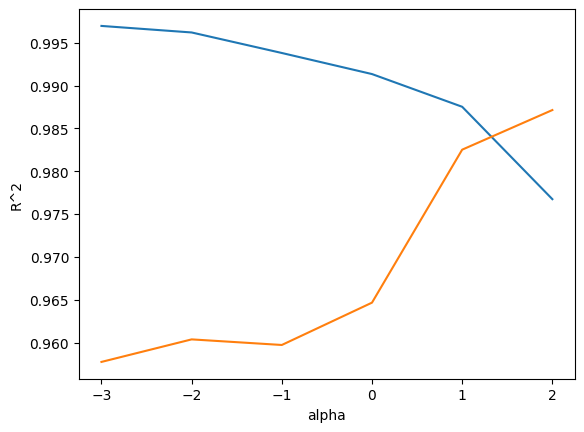

In [23]:
import numpy as np
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()
# 여기서 두 그래프가 가장 가깝고 테스트 세트의 점수가 가장 높은 -1 즉 0.1의 값

##### lasso 모델
    - 계수의 절댓값을 기준으로 규제를 적용
    - 계수의 크기를 아예 0으로 만들 수도 있음

In [24]:
# 릿지 모델과 매우 유사, 릿지 클래스를 라쏘 클래스로 바꾸는것이 전부
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=10) # 위에서 한 방법으로 최적의 alpha값을 찾음
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))


0.988945620099251
0.9631783232948169


C:\Users\yerin\Desktop\DAMF\ML\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.606e+02, tolerance: 4.998e+02
  model = cd_fast.enet_coordinate_descent(


In [25]:
lasso.coef_ # 55개의 특성을 모델에 주입했지만 0이 40개이므로 라쏘모델이 사용한 특성은 15개밖에 되지 않음
# 이러한 특징으로 라쏘 모델은 유용한 특성을 골라내는 용도로도 사용 가능

array([  0.        ,   0.        ,   0.        ,   0.        ,
        65.51364171,   7.55099741,  10.66776132,   0.        ,
         5.64134932,  76.41222737, 112.53146241,   0.        ,
        55.50521526,   0.        ,   0.        ,   0.13236143,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ])